In [46]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [8]:
conn = sqlite3.connect('factbook.db')
pd.read_sql_query('SELECT * FROM sqlite_master', conn)

,type,name,tbl_name,rootpage,sql
0,table,sqlite_sequence,sqlite_sequence,3,"CREATE TABLE sqlite_sequence(name,seq)"
1,table,facts,facts,47,"CREATE TABLE ""facts"" (""id"" INTEGER PRIMARY KEY..."


In [10]:
pd.read_sql_query('SELECT * FROM facts LIMIT 5', conn)

,id,code,name,area,area_land,area_water,population,population_growth,birth_rate,death_rate,migration_rate
0,1,af,Afghanistan,652230,652230,0,32564342,2.32,38.57,13.89,1.51
1,2,al,Albania,28748,27398,1350,3029278,0.30,12.92,6.58,3.30
2,3,ag,Algeria,2381741,2381741,0,39542166,1.84,23.67,4.31,0.92
3,4,an,Andorra,468,468,0,85580,0.12,8.13,6.96,0.00
4,5,ao,Angola,1246700,1246700,0,19625353,2.78,38.78,11.49,0.46


# Population Analysis

In [13]:
pd.read_sql_query('SELECT MIN(population) FROM facts', conn)

,MIN(population)
0,0


In [14]:
pd.read_sql_query('SELECT MAX(population) FROM facts', conn)

,MAX(population)
0,7256490011


In [15]:
pd.read_sql_query('SELECT MIN(population_growth) FROM facts', conn)

,MIN(population_growth)
0,0.0


In [16]:
pd.read_sql_query('SELECT MAX(population_growth) FROM facts', conn)

,MAX(population_growth)
0,4.02


In [22]:
pd.read_sql_query('SELECT name FROM facts WHERE population == (SELECT MIN(population) FROM facts)', conn)


,name
0,Antarctica


In [23]:
pd.read_sql_query('SELECT name FROM facts WHERE population == (SELECT MAX(population) FROM facts)', conn)

,name
0,World


Unsurprisingly, the places with the highest and lowest populations are the world, and Antarctica respectively.

# Visualizing populations

In [35]:
pop_to_death_rate = pd.read_sql_query('SELECT population, population_growth, birth_rate, death_rate FROM facts WHERE NOT population == (SELECT MAX(population) FROM facts) OR (SELECT MIN(population) from facts)', conn)

In [38]:
pop_and_growth = pop_to_death_rate[['population', 'population_growth']]

In [39]:
birth_and_death_rate = pop_to_death_rate[['birth_rate', 'death_rate']]

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f3cd5399d30>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x7f3cd52f6668>]], dtype=object)

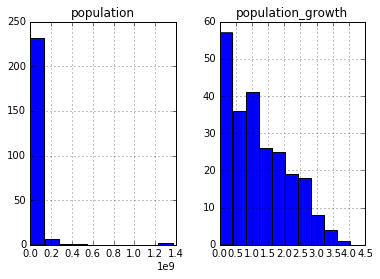

In [47]:
pop_and_growth.hist()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f3cd525e908>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x7f3cd5314fd0>]], dtype=object)

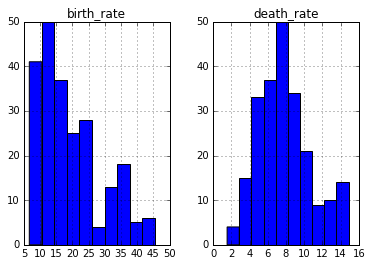

In [48]:
birth_and_death_rate.hist()

# Population Density

In [73]:
# pop density == ratio of population to land area
pop_densities = pd.read_sql_query('SELECT name AS Country, population / CAST(area_land AS FLOAT) AS "Population Density" FROM facts WHERE population > 0 AND area_land > 0 ORDER BY "Population Density" DESC', conn)
pop_densities

,Country,Population Density
0,Macau,21168.964286
1,Monaco,15267.500000
2,Singapore,8259.784571
3,Hong Kong,6655.271202
4,Gaza Strip,5191.819444
5,Gibraltar,4876.333333
6,Bahrain,1771.859211
7,Maldives,1319.640940
8,Malta,1310.015823
9,Bermuda,1299.925926


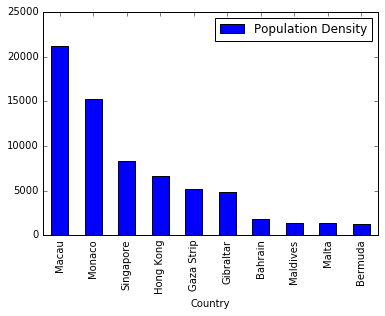

In [77]:
pop_densities[:10].plot.bar(x='Country', y='Population Density')

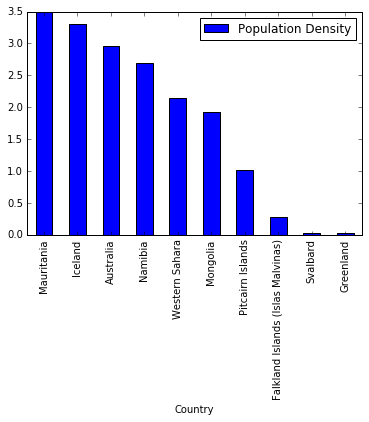

In [92]:
pop_densities[-10:].plot.bar(x='Country', y='Population Density')